<a href="https://colab.research.google.com/github/ooo-dev-code/Android-apps/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

!pip install --upgrade tensorflow tensorflow-hub
import tensorflow as tf
import tensorflow_hub as hub

from imblearn.over_sampling import RandomOverSampler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.18.1 which is incompatible.


# Diabeties

In [79]:
data = pd.read_csv("./diabetes.csv")

In [80]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


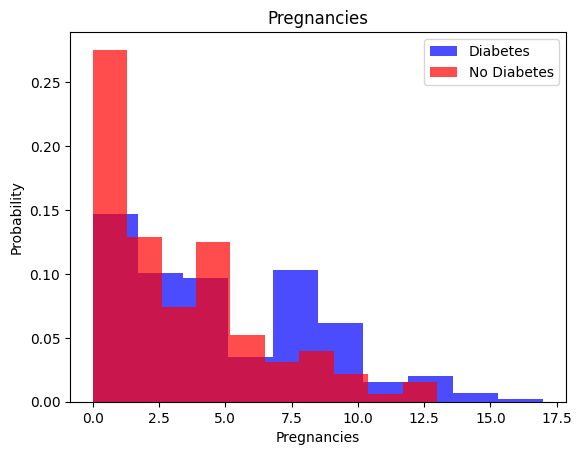

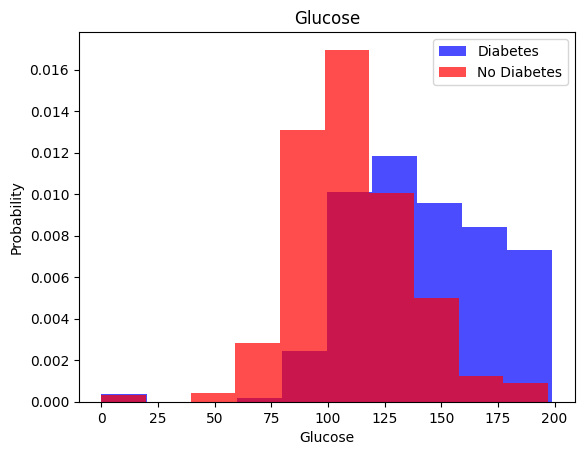

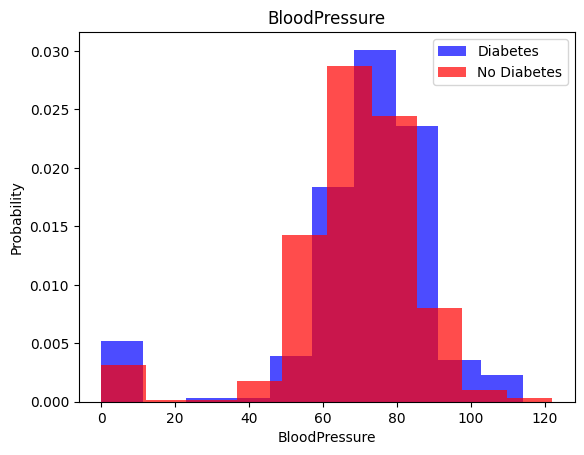

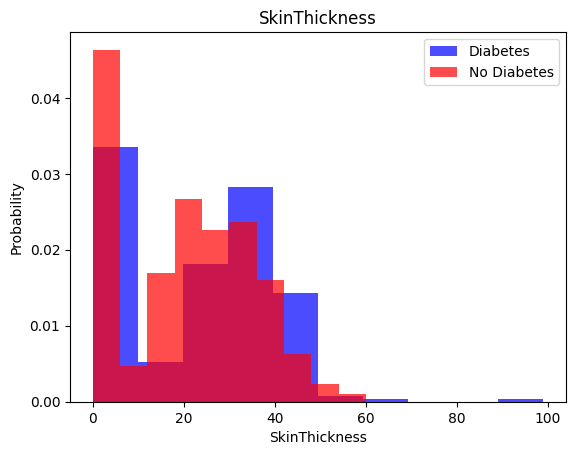

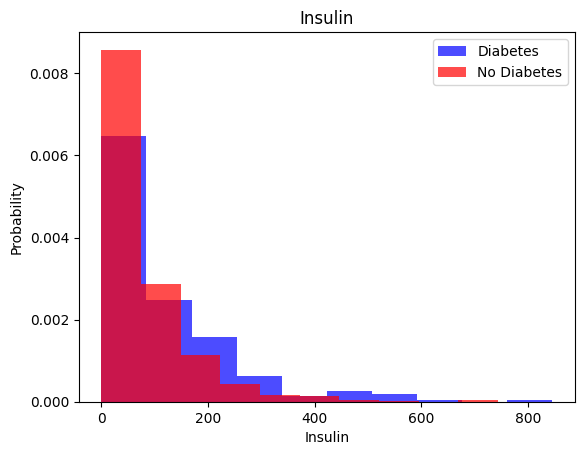

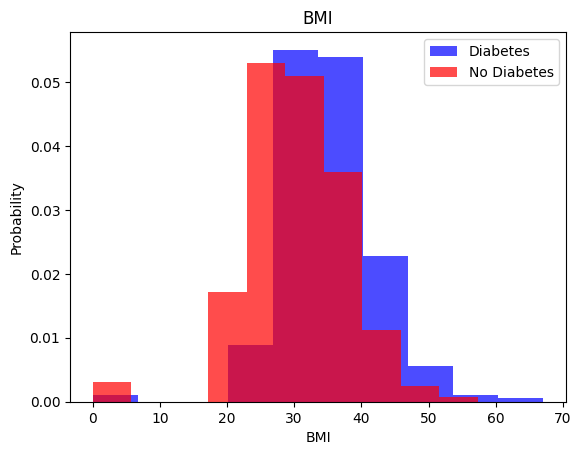

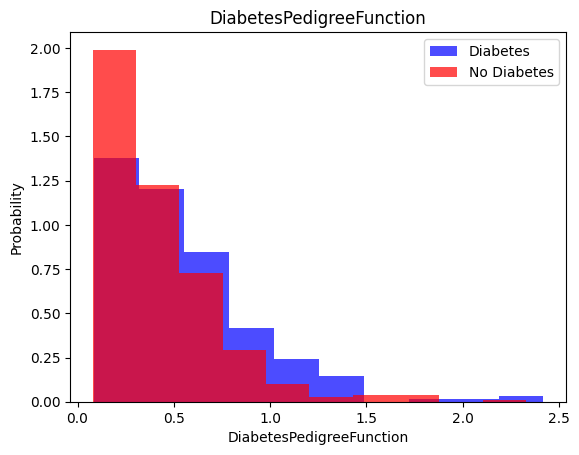

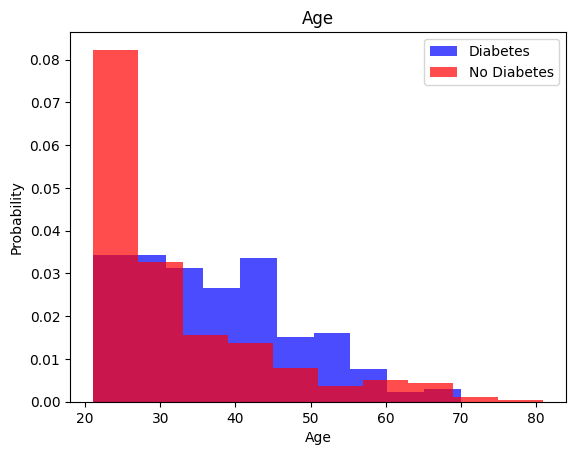

In [81]:
for i in range(len(data.columns[:-1])):
  label = data.columns[i]
  plt.hist(data[data["Outcome"]==1][label], color="blue", label="Diabetes", alpha=0.7, density=True) #Use density because the lenght of the datas are not the same.
  plt.hist(data[data["Outcome"]==0][label], color='red', label="No Diabetes", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [82]:
X = data[data.columns[:-1]].values
y = data[data.columns[-1]].values

In [83]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
over = RandomOverSampler()
X, y = over.fit_resample(X, y)

In [84]:
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"), # relu (== if x < 0: x == 0)
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [86]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"]
             )

In [87]:
model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, validation_data=(x_valid, y_valid))

Epoch 1/100
19/19 - 2s - 98ms/step - accuracy: 0.4483 - loss: 0.7259 - val_accuracy: 0.5050 - val_loss: 0.7109
Epoch 2/100
19/19 - 0s - 20ms/step - accuracy: 0.5700 - loss: 0.6816 - val_accuracy: 0.6300 - val_loss: 0.6689
Epoch 3/100
19/19 - 0s - 13ms/step - accuracy: 0.6717 - loss: 0.6473 - val_accuracy: 0.7050 - val_loss: 0.6370
Epoch 4/100
19/19 - 0s - 11ms/step - accuracy: 0.7033 - loss: 0.6209 - val_accuracy: 0.7100 - val_loss: 0.6097
Epoch 5/100
19/19 - 0s - 16ms/step - accuracy: 0.7350 - loss: 0.5985 - val_accuracy: 0.7350 - val_loss: 0.5877
Epoch 6/100
19/19 - 0s - 16ms/step - accuracy: 0.7450 - loss: 0.5799 - val_accuracy: 0.7250 - val_loss: 0.5683
Epoch 7/100
19/19 - 0s - 11ms/step - accuracy: 0.7367 - loss: 0.5643 - val_accuracy: 0.7350 - val_loss: 0.5515
Epoch 8/100
19/19 - 0s - 12ms/step - accuracy: 0.7417 - loss: 0.5521 - val_accuracy: 0.7300 - val_loss: 0.5380
Epoch 9/100
19/19 - 0s - 7ms/step - accuracy: 0.7517 - loss: 0.5394 - val_accuracy: 0.7300 - val_loss: 0.5239
Ep

In [88]:
model.evaluate(x_test, y_test, verbose=2)

7/7 - 0s - 8ms/step - accuracy: 0.7750 - loss: 0.4771


[0.47714924812316895, 0.7749999761581421]

# Wine Review / RNN

In [89]:
df = pd.read_csv("wine-reviews.csv", usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])
df = df.dropna(subset=["description", "points"])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


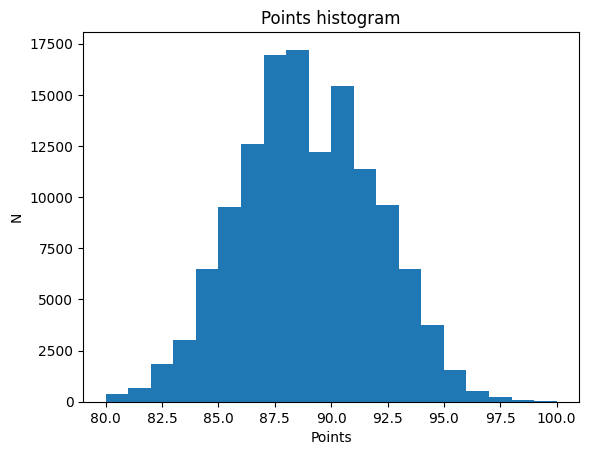

In [90]:
plt.hist(df.points, bins=20)
plt.title("Points histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [91]:
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "label"]]

In [92]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [93]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [94]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

# Embedding + Model

In [103]:
!pip install tf_keras
import tf_keras
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

model = tf_keras.Sequential()
model.add(hub_layer)
model.add(tf_keras.layers.Dense(16, activation='relu'))
model.add(tf_keras.layers.Dropout(0.4))
model.add(tf_keras.layers.Dense(16, activation='relu'))
model.add(tf_keras.layers.Dropout(0.4))
model.add(tf_keras.layers.Dense(1, activation='sigmoid'))


In [106]:
model.compile(optimizer = tf_keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])

In [107]:
model.evaluate(train_data)

102/102 [==============================] - 5s 23ms/step - loss: 0.7425 - accuracy: 0.3768


[0.7424511313438416, 0.3768081068992615]

In [108]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
102/102 [==============================] - 168s 2s/step - loss: 0.6722 - accuracy: 0.5855 - val_loss: 0.6016 - val_accuracy: 0.7015
Epoch 2/10
102/102 [==============================] - 156s 2s/step - loss: 0.5313 - accuracy: 0.7440 - val_loss: 0.4222 - val_accuracy: 0.8146
Epoch 3/10
102/102 [==============================] - 131s 1s/step - loss: 0.4362 - accuracy: 0.8136 - val_loss: 0.3832 - val_accuracy: 0.8247
Epoch 4/10
102/102 [==============================] - 131s 1s/step - loss: 0.3884 - accuracy: 0.8389 - val_loss: 0.3720 - val_accuracy: 0.8283
Epoch 5/10
102/102 [==============================] - 131s 1s/step - loss: 0.3589 - accuracy: 0.8513 - val_loss: 0.3694 - val_accuracy: 0.8333
Epoch 6/10
102/102 [==============================] - 146s 1s/step - loss: 0.3377 - accuracy: 0.8613 - val_loss: 0.3690 - val_accuracy: 0.8337
Epoch 7/10
102/102 [==============================] - 131s 1s/step - loss: 0.3203 - accuracy: 0.8690 - val_loss: 0.3761 - val_accuracy: 0.8351

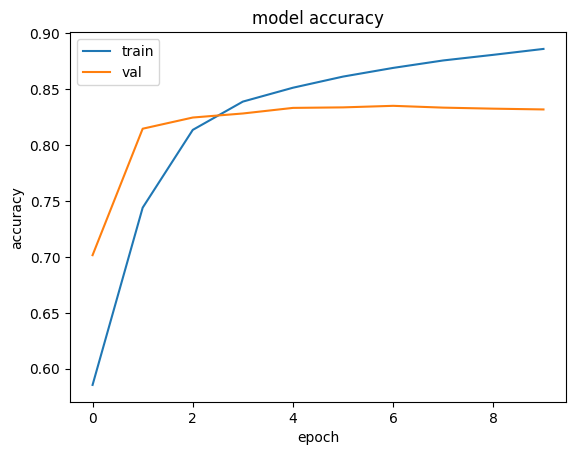

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')